# Deep Neural Network Model
---

### DNN on normal Dataset:

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # disable GPU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

UFC_FINAL = pd.read_csv("UFC_FINAL.csv")

# tackling imbalance issue
#theMin = UFC_FINAL["Winner"].value_counts().min()
#minority = UFC_FINAL[UFC_FINAL["Winner"]=="Blue"].iloc[0:theMin]
#undersampleMaj = UFC_FINAL[UFC_FINAL["Winner"]=="Red"].iloc[0:theMin]
#UFC_FINAL = pd.concat([minority, undersampleMaj], axis=0)
#UFC_FINAL = UFC_FINAL.sample(frac=1).reset_index(drop=True)

UFC_FINAL["Winner"].value_counts()

Red     3142
Blue    1493
Name: Winner, dtype: int64

#### model with early stopping callback:

In [3]:
# encode blue and red as 1 and 0
UFC_FINAL["Winner"] = UFC_FINAL["Winner"].replace("Blue", 1)
UFC_FINAL["Winner"] = UFC_FINAL["Winner"].replace("Red", 0)

# train/test split
X = UFC_FINAL.drop("Winner", axis=1).values
y = UFC_FINAL["Winner"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

# scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape} | y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

# model
model = Sequential()

# input layer
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5)) # deactivates 50% of nodes

# h1
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

# h2
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

# h3
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping # prevent diverge of loss & val_loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)

X_train shape: (3476, 42) | X_test shape: (1159, 42) | y_train shape: (3476,) | y_test shape: (1159,)


##### without PCA Performance

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3476 samples, validate on 1159 samples
Epoch 1/10
3476/3476 [==============================] - 2s 616us/sample - loss: 0.6601 - acc: 0.6513 - val_loss: 0.6484 - val_acc: 0.6644
Epoch 2/10
3476/3476 [==============================] - 1s 255us/sample - loss: 0.6396 - acc: 0.6792 - val_loss: 0.6414 - val_acc: 0.6644
Epoch 3/10
3476/3476 [==============================] - 1s 177us/sample - loss: 0.6349 - acc: 0.6818 - val_loss: 0.6383 - val_acc: 0.6644
Epoch 4/10
3476/3476 [==============================] - 1s 215us/sample - loss: 0.6305 - acc: 0.6821 - val_loss: 0.6382 - val_acc: 0.6644
Epoch 5/10
3476/3476 [==============================] - ETA: 0s - loss: 0.6320 - acc: 0.680 - 1s 179us/sample - loss: 0.6305 - acc: 0.6827 - val_loss: 0.6345 - val_acc: 0.6644
Epoch 6/10
3476/3476 [==============================] - 1s 178us/sample - loss: 0.6289 - acc: 0.6824 - val_loss: 0.6336 - val_acc:

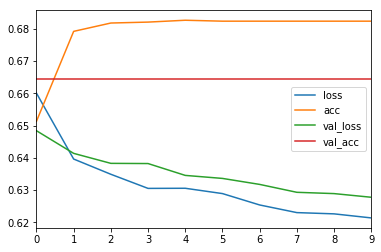

In [4]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=10,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### DNN on PCA-Performed Dataset:

In [5]:
UFC_PCA = pd.read_csv("UFC_PCA.csv")

UFC_PCA["Winner"] = UFC_PCA["Winner"].replace("Blue",1)
UFC_PCA["Winner"] = UFC_PCA["Winner"].replace("Red",0)

# train/test split
X_pca = UFC_PCA.iloc[:,1:].values
y_pca = UFC_PCA["Winner"].values
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.3, random_state=101)

# scaling
scaler_pca = MinMaxScaler()
scaler_pca.fit(X_train_pca)
X_train_pca = scaler_pca.transform(X_train_pca)
X_test_pca = scaler_pca.transform(X_test_pca)

print(f"X_train shape: {X_train_pca.shape} | X_test shape: {X_test_pca.shape} | y_train shape: {y_train_pca.shape} | y_test shape: {y_test_pca.shape}")

# model
model = Sequential()

# input layer
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5)) # deactivates 50% of nodes

# h1
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

# h2
model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.5))

# h3
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping # prevent diverge of loss & val_loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=16)

X_train shape: (3244, 10) | X_test shape: (1391, 10) | y_train shape: (3244,) | y_test shape: (1391,)


##### PCA Performance:

Train on 3244 samples, validate on 1391 samples
Epoch 1/10
3244/3244 [==============================] - 2s 583us/sample - loss: 0.6557 - acc: 0.6433 - val_loss: 0.6387 - val_acc: 0.6650
Epoch 2/10
3244/3244 [==============================] - 0s 154us/sample - loss: 0.6324 - acc: 0.6822 - val_loss: 0.6372 - val_acc: 0.6650
Epoch 3/10
3244/3244 [==============================] - 1s 174us/sample - loss: 0.6321 - acc: 0.6828 - val_loss: 0.6387 - val_acc: 0.6650
Epoch 4/10
3244/3244 [==============================] - 1s 267us/sample - loss: 0.6324 - acc: 0.6834 - val_loss: 0.6371 - val_acc: 0.6650
Epoch 5/10
3244/3244 [==============================] - 1s 199us/sample - loss: 0.6276 - acc: 0.6834 - val_loss: 0.6354 - val_acc: 0.6650
Epoch 6/10
3244/3244 [==============================] - 1s 206us/sample - loss: 0.6255 - acc: 0.6834 - val_loss: 0.6337 - val_acc: 0.6650
Epoch 7/10
3244/3244 [==============================] - 1s 175us/sample - loss: 0.6272 - acc: 0.6834 - val_loss: 0.6317 - va

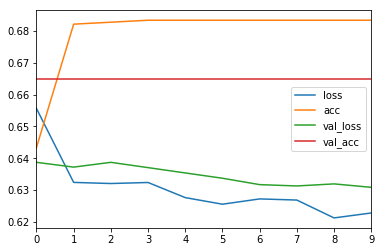

In [6]:
model.fit(x=X_train_pca, 
          y=y_train_pca, 
          epochs=10,
          validation_data=(X_test_pca, y_test_pca), verbose=1,
          callbacks=[early_stop]
          )

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()